In [26]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import shap
import time
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
#import eli5

from sklearn.metrics import f1_score
import numpy as np
import random
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
import statistics as st
random.seed(723)
np.random.seed(723)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd "/content/drive/MyDrive/INRIA/18_11_2022"

/content/drive/MyDrive/INRIA/18_11_2022


In [29]:
! ls

'=4.0.0'   KO_metaG.norm.txt


In [30]:
dfMG=pd.read_csv("KO_metaG.norm.txt", delimiter="\t")
dfMG.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)
dfMG.head(3)

,Name,unknown,K00002,K00003,K00004,K00005,K00006,K00007,K00008,K00009,...,K22754,K22755,K22757,K22761,K22762,K22763,K22764,K22766,K22769,K22770
0,TARA_X000000368,1066.943519,0.007901,0.720651,0.007374,0.065015,0.006160,0.003610,0.022136,0.063239,...,0.0,0.000239,0.117896,0.002513,0.002100,0.000817,0.000037,0.002555,0.0,0.00000
1,TARA_Y200000002,1005.294640,0.004569,0.791990,0.001405,0.137334,0.000713,0.000821,0.028764,0.027357,...,0.0,0.000096,0.066136,0.000266,0.000262,0.000694,0.000083,0.000455,0.0,0.00001
2,TARA_A200000159,1445.388792,0.003585,0.626508,0.005761,0.094833,0.001693,0.000240,0.024149,0.049252,...,0.0,0.000407,0.083504,0.001305,0.000945,0.000932,0.000000,0.001044,0.0,0.00000


In [31]:
dfMG.shape

(180, 9026)

In [32]:
%%capture
!pip install scprep phate umap-learn

In [33]:
%%capture
!pip install umap-learn[plot]

In [34]:
%%capture
!pip install joblib==1.1.0

In [35]:
%%capture
!pip install hdbscan

In [36]:
%%capture
!pip install kora

In [37]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [38]:
%%capture
!pip install git+https://github.com/SZJShuffle/pySankey2.git

In [39]:
import umap.umap_ as umap
from umap import UMAP
import hdbscan 
import plotly.express as px

In [40]:
umap_datosMG = umap.UMAP(n_neighbors=50,n_components=3, min_dist=0.1, spread=1.0,random_state=42)
umap_datosMG_3D = umap_datosMG.fit_transform(dfMG.drop(columns=["Name","unknown"]))

labels_umap_datosMG_3D= hdbscan.HDBSCAN().fit_predict(umap_datosMG_3D)

In [41]:
labels_umap_datosMG_colors_v2=labels_umap_datosMG_3D.astype(str)
labels_umap_datosMG_colors_v2
dfMG["clusterID"]= pd.Series(labels_umap_datosMG_colors_v2)
dfMG.head()

,Name,unknown,K00002,K00003,K00004,K00005,K00006,K00007,K00008,K00009,...,K22755,K22757,K22761,K22762,K22763,K22764,K22766,K22769,K22770,clusterID
0,TARA_X000000368,1066.943519,0.007901,0.720651,0.007374,0.065015,0.006160,0.003610,0.022136,0.063239,...,0.000239,0.117896,0.002513,0.002100,0.000817,0.000037,0.002555,0.0,0.000000,1
1,TARA_Y200000002,1005.294640,0.004569,0.791990,0.001405,0.137334,0.000713,0.000821,0.028764,0.027357,...,0.000096,0.066136,0.000266,0.000262,0.000694,0.000083,0.000455,0.0,0.000010,1
2,TARA_A200000159,1445.388792,0.003585,0.626508,0.005761,0.094833,0.001693,0.000240,0.024149,0.049252,...,0.000407,0.083504,0.001305,0.000945,0.000932,0.000000,0.001044,0.0,0.000000,1
3,TARA_A200000113,834.386113,0.003152,0.701588,0.000379,0.046740,0.000000,0.000311,0.020406,0.035872,...,0.000000,0.091899,0.000000,0.000000,0.000142,0.000000,0.000024,0.0,0.000007,1
4,TARA_X000001036,1071.164118,0.004687,0.710648,0.010831,0.037637,0.002630,0.000941,0.057089,0.058175,...,0.000271,0.119328,0.001846,0.001367,0.000796,0.000099,0.001466,0.0,0.000000,1


In [42]:
###Aquí graficaré los datos 

In [43]:
###OJO: el hover_name es para que nos diga el nombre del número raro

In [44]:
UMAP_datosMG = px.scatter_3d(umap_datosMG_3D, x=0, y=1, z=2,width=1200, height=900,opacity=.4,
                                     template="plotly_white", color=labels_umap_datosMG_colors_v2,
                                     hover_name=dfMG.Name, 
                                     labels={"0": "Dimension 1 (UMAP)","1": "Dimension 2 (UMAP)","2": "Dimension 3 (UMAP)"})
UMAP_datosMG.update_traces(marker_size=12)
UMAP_datosMG.update_layout(legend_itemsizing="trace", legend_bgcolor="white", legend_font_size=30, legend_title="Location", font=dict( size=16))
UMAP_datosMG.show()

In [45]:
###Aquí voy a botar la muestra fuera de cluster "TARA_B110000914"

In [46]:
i= dfMG[(dfMG.Name=="TARA_B110000914")].index


In [47]:
dfMG2=dfMG
dfMG2.shape

(180, 9027)

In [48]:
dfMG2=dfMG2.drop(i)
dfMG2.shape

(179, 9027)

In [49]:
###Aquí voy a botar la muestra fuera de cluster "TARA_B110000008"

In [50]:
ii= dfMG[(dfMG.Name=="TARA_B110000008")].index

In [51]:
dfMG3=dfMG2
dfMG3.shape

(179, 9027)

In [52]:
dfMG3=dfMG3.drop(ii)
dfMG3.shape

(178, 9027)

In [53]:
##Ahora hacer XGboost con la columna cluster como target, y todo el resto (menos Name, unknown, clusterID) será mi feature 


In [54]:
target = dfMG3["clusterID"]
display(target.head(2))


0    1
1    1
Name: clusterID, dtype: object

In [55]:
features = dfMG3.drop(columns=['Name', 'unknown', 'clusterID'])
display(features.head(2))

,K00002,K00003,K00004,K00005,K00006,K00007,K00008,K00009,K00010,K00011,...,K22754,K22755,K22757,K22761,K22762,K22763,K22764,K22766,K22769,K22770
0,0.007901,0.720651,0.007374,0.065015,0.006160,0.003610,0.022136,0.063239,0.241335,0.0,...,0.0,0.000239,0.117896,0.002513,0.002100,0.000817,0.000037,0.002555,0.0,0.00000
1,0.004569,0.791990,0.001405,0.137334,0.000713,0.000821,0.028764,0.027357,0.270309,0.0,...,0.0,0.000096,0.066136,0.000266,0.000262,0.000694,0.000083,0.000455,0.0,0.00001


In [56]:
seed = 110
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.20, 
                                                    random_state=seed, 
                                                    shuffle=True, 
                                                    stratify=target)

In [57]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Columns: 9024 entries, K00002 to K22770
dtypes: float64(9024)
memory usage: 12.3 MB


In [58]:
xgboot_clusterID_classification = XGBClassifier(
    tree_method = "gpu_hist",
    objective='multi:softmax',
    random_state=seed, 
    eval_metric=["merror"],
    colsample_bytree= 0.8,
    gamma= 0,
    learning_rate= 0.1,
    max_depth= 3,
    n_estimators= 100,
    reg_lambda= 1.0,
    scale_pos_weight= 1,
    subsample= 1.0)

In [59]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror","mlogloss"]

In [60]:
%time xgboot_clusterID_classification.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-merror:0	validation_0-mlogloss:1.38782	validation_1-merror:0.055556	validation_1-mlogloss:1.40793
[1]	validation_0-merror:0	validation_0-mlogloss:1.21182	validation_1-merror:0.027778	validation_1-mlogloss:1.24576
[2]	validation_0-merror:0	validation_0-mlogloss:1.06747	validation_1-merror:0.027778	validation_1-mlogloss:1.11571
[3]	validation_0-merror:0	validation_0-mlogloss:0.946488	validation_1-merror:0.027778	validation_1-mlogloss:1.00737
[4]	validation_0-merror:0	validation_0-mlogloss:0.843181	validation_1-merror:0.027778	validation_1-mlogloss:0.912606
[5]	validation_0-merror:0	validation_0-mlogloss:0.753907	validation_1-merror:0.027778	validation_1-mlogloss:0.831186
[6]	validation_0-merror:0	validation_0-mlogloss:0.676085	validation_1-merror:0.027778	validation_1-mlogloss:0.765019
[7]	validation_0-merror:0	validation_0-mlogloss:0.607234	validation_1-merror:0.027778	validation_1-mlogloss:0.697921
[8]	validation_0-merror:0	validation_0-mlogloss:0.547406	validation_1-m

XGBClassifier(colsample_bytree=0.8, eval_metric=['merror'],
              objective='multi:softprob', random_state=110, reg_lambda=1.0,
              subsample=1.0, tree_method='gpu_hist')

In [61]:
pred_test = xgboot_clusterID_classification.predict(X_test)
pred_train = xgboot_clusterID_classification.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuracy: ', accuracy_score(y_test, pred_test))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,pred_test))
print('\nClassification Report:')
print(classification_report(y_test,pred_test))

Train Accuracy:  1.0
Test Accuracy:  1.0

Confusion Matrix:
[[ 1  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  7]]

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [62]:
###Código para visualizar mlogloss en vez de AUC. 

In [63]:
from sklearn.metrics import log_loss

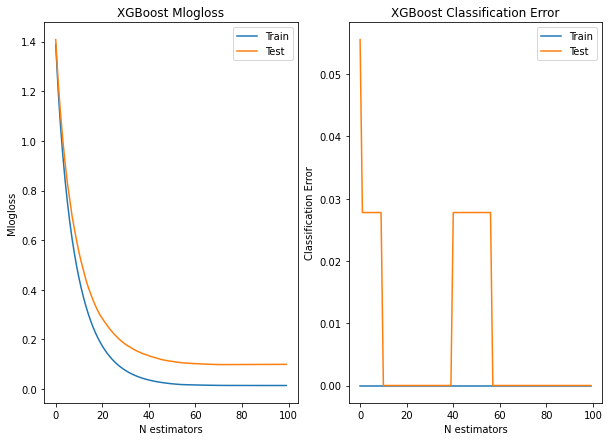

<Figure size 432x288 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt

# retrieve performance metrics
results = xgboot_clusterID_classification.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(10,7))

# plot Mglogloss
ax[0].plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax[0].plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax[0].legend()
ax[0].set_title('XGBoost Mlogloss')
ax[0].set_ylabel('Mlogloss')
ax[0].set_xlabel('N estimators')


# plot classification error
ax[1].plot(x_axis, results['validation_0']['merror'], label='Train')
ax[1].plot(x_axis, results['validation_1']['merror'], label='Test')
ax[1].legend()
ax[1].set_title('XGBoost Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show()
plt.tight_layout()

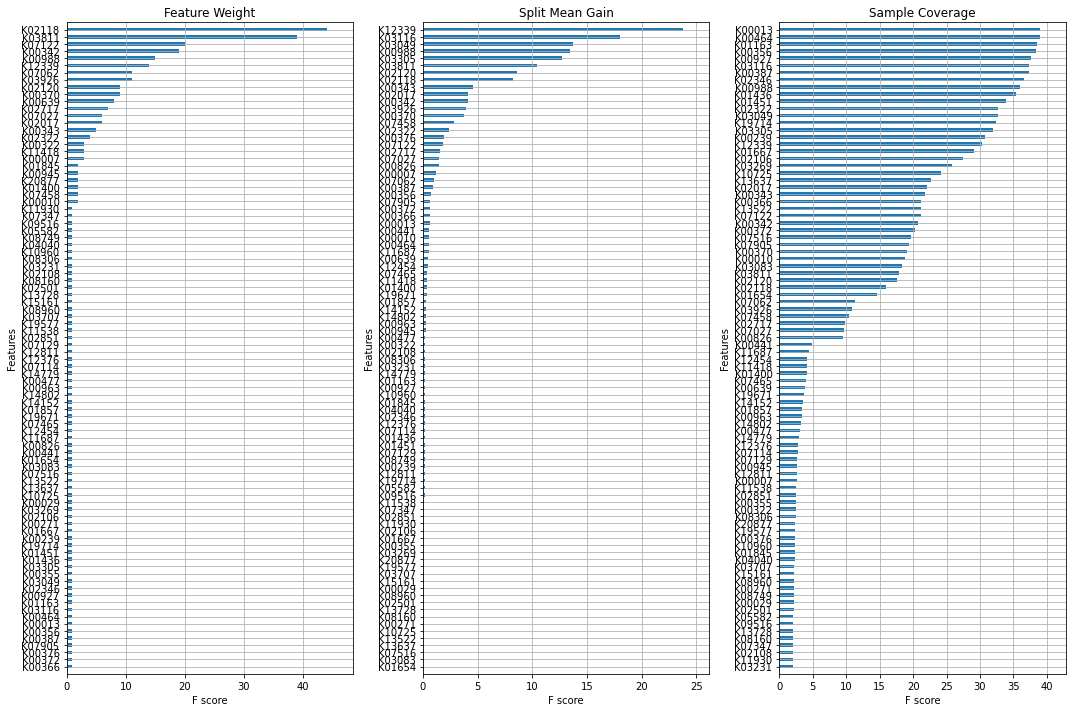

In [65]:


# store the winning model in a new variable
xgc = xgboot_clusterID_classification
# saving the feature names to the model
xgc.get_booster().feature_names = X_train.columns.to_list()

# Create the feature importances plot
fig, ax = plt.subplots(1, 3, figsize=(15,10))

# plot importances with feature weight
# "weight" is the number of times a feature appears in a tree
xgb.plot_importance(
    booster=xgc, 
    importance_type='weight',
    title='Feature Weight',
    show_values=False,
    height=0.5,
    ax=ax[0],
)

# plot importances with split mean gain
# "gain" is the average gain of splits which use the feature
xgb.plot_importance(
    booster=xgc,
    importance_type='gain',
    title='Split Mean Gain',
    show_values=False,
    height=0.5,
    ax=ax[1]
)

# plot importances with sample coverage
# "cover" is the average coverage of splits which use the feature 
# where coverage is defined as the number of samples affected by 
# the split max_num_features

xgb.plot_importance(
    xgc,
    importance_type='cover',
    title='Sample Coverage',
    show_values=False,
    height=0.5,
    ax=ax[2]
)

plt.tight_layout()
plt.show()